## Week 10 and 11 Assignment - DATASCI200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository and provide a link in the last question in gradescope. 

Assignment due date: 11:59PM PT the night before the Week 12 Live Session. Do **NOT** push/upload the data file. 

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice cleaning data and answering questions

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say for example **1a answer here:** to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)
- This homework assignment is not autograded because of the variety of responses one could give. 
  - Please upload this notebook to the autograder page and the TAs will manually grade it. 
  - Ensure that each cell is run and outputs your answer for ease of grading! 
  - Highly suggest to do a `restart & run all` before uploading your code to ensure everything runs and outputs correctly.
  - Answers without code (or code that runs) will be given 0 points.
- **This is meant to simulate real world data so you will have to do some external research to determine what some of the answers are!** 

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1Lgg-PwXQ6TQLDowd6XyBxZw5g1NGWPjB/view?usp=sharing. You should download and save this file in the same folder as this notebook is stored.  This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Data Questions

You are working for a California state-wide election campaign. Your boss wants you to examine historic 2016 election contribution data to see what zipcodes are more supportive of fundraising for your candidate. 

Your boss asks you to filter out some of the records:
- Only use primary 2016 contribution data (more like how your race is).
- Concentrate on Bernie Sanders as a candidate (most a like your candidate)

The questions your boss wants answered is:
- Which zipcode (5-digit zipcode) had the highest count of contributions and the most dollar amount?
- What day(s) of the month do most people donate?

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [154]:
import pandas as pd
import numpy as np
from datetime import datetime

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format

# Define a date parser to pass to read_csv
d = lambda x: datetime.strptime(x, '%d-%b-%y')

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('./P00000001-CA.csv', index_col=False, parse_dates=['contb_receipt_dt'], date_parser=d)

# Note - for now, it is okay to ignore the warning about mixed types. 

/var/folders/0m/zy7vbghn7vd1f4hk_kfpr9880000gn/T/ipykernel_42589/3949109043.py:14: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  contrib = pd.read_csv('./P00000001-CA.csv', index_col=False, parse_dates=['contb_receipt_dt'], date_parser=d)
/var/folders/0m/zy7vbghn7vd1f4hk_kfpr9880000gn/T/ipykernel_42589/3949109043.py:14: DtypeWarning: Columns (6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  contrib = pd.read_csv('./P00000001-CA.csv', index_col=False, parse_dates=['contb_receipt_dt'], date_parser=d)


***
## 1. Initial Data Checks (50 points)

First we will take a preliminary look at the data to check that it was loaded correctly and contains the info we need.

The questions to answer at the end of this section:
- Do we have the correct # of columns and rows. 
- Do the records contain data for the questions we want to answer 
- What columns are important? 
- What columns can be dropped?
- What are the data problems?

**1a.** Print the *shape* of the data. Does this match the expectation? (2 points)

In [155]:
# 1a YOUR CODE HERE

shape = contrib.shape
print(shape)

(1125659, 18)


- **1a answer here:** 

# Yes. This matches with expectation that there is about 1 million count of contributions in election as a ball park sanity check.

**1b.** Print a list of column names. Are all the columns included that are in the documentation? (2 points)

In [156]:
# 1b YOUR CODE HERE
print(contrib.columns)

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'],
      dtype='object')


- **1b answer here:** 

# Yes. The columns are included in the documentation.

**1c** Print out the first five rows of the dataset. How do the columns `cand_id`, `cand_nm` and `contbr_st` look? (3 points)

In [157]:
# 1c YOUR CODE HERE

first_five_rows = contrib.head(5)
print(first_five_rows[['cand_id','cand_nm','contbr_st']])

     cand_id                  cand_nm contbr_st
0  P00003392  Clinton, Hillary Rodham        CA
1  P00003392  Clinton, Hillary Rodham        CA
2  P00003392  Clinton, Hillary Rodham        CA
3  P60007168         Sanders, Bernard        CA
4  P60007168         Sanders, Bernard        CA


- **1c answer here:** 

# The 3 columns look credible with candiate id, candidate name, and state of contributor.

**1d.** Print out the values for the column `election_tp`. In your own words, based on the documentation, what information does the `election_tp` variable contain? Do the values in the column match the documentation? (3 points)

In [158]:
# 1d YOUR CODE HERE
types = contrib['election_tp'].unique()
print(types)

['P2016' 'G2016' nan 'P2020']


- **1d answer here:** 

# The election_tp column labels which election the contribution goes toward. P or G as the first character to denote primary or general election. The following 4 characters in numbers contains the year of election.

**1e.** Print out the datatypes for all of the columns. What are the datatypes for the `contbr_zip`, `contb_receipt_amt`, `contb_receipt_dt`? (5 points)

In [159]:
# 1e YOUR CODE HERE
data_types = contrib.dtypes
print("Data types for all columns:")
print(contrib.dtypes)

contbr_zip_data_type = data_types['contbr_zip']
contb_receipt_amt_data_type = data_types['contb_receipt_amt']
contb_receipt_dt_data_type = data_types['contb_receipt_dt']

print("\nData type of 'contbr_zip' column:", contbr_zip_data_type)
print("Data type of 'contb_receipt_amt' column:", contb_receipt_amt_data_type)
print("Data type of 'contb_receipt_dt' column:", contb_receipt_dt_data_type)


Data types for all columns:
cmte_id                      object
cand_id                      object
cand_nm                      object
contbr_nm                    object
contbr_city                  object
contbr_st                    object
contbr_zip                   object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
receipt_desc                 object
memo_cd                      object
memo_text                    object
form_tp                      object
file_num                      int64
tran_id                      object
election_tp                  object
dtype: object

Data type of 'contbr_zip' column: object
Data type of 'contb_receipt_amt' column: float64
Data type of 'contb_receipt_dt' column: datetime64[ns]


- **1e answer here:** 

# Data type of 'contbr_zip' column: object
# Data type of 'contb_receipt_amt' column: float64
# Data type of 'contb_receipt_dt' column: datetime64[ns]

**1f.** What columns have the most non-nulls?  Would you recommend to drop any columns based on the number of nulls? (5 points)

In [160]:
# 1f YOUR CODE HERE

non_null_values = contrib.count()
sorted_by_non_nulls = non_null_values.sort_values(ascending=False)

# Print the columns with the most non-null values
print("Columns with the most non-null values:")
print(sorted_by_non_nulls)

print("I recommend to drop the following: contbr_employer, memo_text, memo_cd, receipt_desc. Because the data is incomplete and optional for analysis of transactions.")


Columns with the most non-null values:
cmte_id              1125659
cand_id              1125659
tran_id              1125659
file_num             1125659
form_tp              1125659
contb_receipt_dt     1125659
contb_receipt_amt    1125659
contbr_st            1125659
contbr_nm            1125659
cand_nm              1125659
contbr_city          1125633
contbr_zip           1125564
election_tp          1124234
contbr_occupation    1115260
contbr_employer       967757
memo_text             501148
memo_cd               144268
receipt_desc           15045
dtype: int64
I recommend to drop the following: contbr_employer, memo_text, memo_cd, receipt_desc. Because the data is incomplete and optional for analysis of transactions.


- **1f answer here:** 

# cmte_id, cand_id, tran_id, file_num, form_tp, contb_receipt_dt, contb_receipt_amt, contbr_st, contbr_nm, cand_nm contains the most non-null values.

# I recommend to drop the following: contbr_employer, memo_text, memo_cd, receipt_desc based on less non-null values. Because the data is incomplete and optional for analysis of transactions.

**1g.** A column we know that we want to use is the cand_nm column.  From the documentation each candidate is a unique candidate id also. Check data quality of `cand_id` column to see if it matches `cand_nm` column. Specifically check to ensure our targetted candidate 'Bernard Sanders' always has the same cand_id throughout. Any issues with `cand_nm` matching `cand_id`? (5 points)

In [161]:
# 1g YOUR CODE HERE
cand_id_and_nm = contrib[['cand_id', 'cand_nm']]
unique_combinations = cand_id_and_nm.drop_duplicates()
print("Unique combinations of 'cand_id' and 'cand_nm':")
print(unique_combinations)

sanders_combinations = unique_combinations[unique_combinations['cand_nm'].str.contains('Sanders')]
print("Unique combinations of 'cand_id' and 'cand_nm' containing 'Sanders':")
print(sanders_combinations)

print('\nYes. Sanders always have cand_id: P60007168')

Unique combinations of 'cand_id' and 'cand_nm':
          cand_id                    cand_nm
0       P00003392    Clinton, Hillary Rodham
3       P60007168           Sanders, Bernard
10      P60006111  Cruz, Rafael Edward 'Ted'
8884    P60006046              Walker, Scott
8899    P60008059                  Bush, Jeb
9745    P60006723               Rubio, Marco
10957   P60003670            Kasich, John R.
11528   P60008521   Christie, Christopher J.
14682   P20002671              Johnson, Gary
15680   P80001571           Trump, Donald J.
21565   P40003576                 Paul, Rand
26202   P60008885      Webb, James Henry Jr.
37395   P60005915        Carson, Benjamin S.
42451   P60007242             Fiorina, Carly
42540   P20002721       Santorum, Richard J.
42610   P60008398              Jindal, Bobby
128284  P80003478             Huckabee, Mike
129089  P60009685           Lessig, Lawrence
136834  P60007671    O'Malley, Martin Joseph
137846  P60007697         Graham, Lindsey O.
142500 

- **1g answer here:** 

# Yes. Sanders always have cand_id: P60007168. This is verified with unique combination of candidate ids with candidate names.

**1h.** Another area to check is to make sure all of the records are from California. Check the `contbr_st` column - are there any records outside of California based on `contbr_st`? (5 points)

In [162]:
# 1h YOUR CODE HERE

unique_states = contrib['contbr_st'].unique()
print("Unique states in the 'contbr_st' column:")
print(unique_states)

print('\nNo records outsie of california')

Unique states in the 'contbr_st' column:
['CA']

No records outsie of california


- **1h answer here:** 

# No. There are no records outside of california based on contbr_st.

**1i.** The next column to check for the analysis is the `tran_id` column. This column could be the primary key so look for duplicates. How many duplicate entries are there? Any pattern for why are there duplicate entries? (5 points)

In [163]:
# 1i YOUR CODE HERE
duplicate_tran_ids = contrib[contrib.duplicated(subset='tran_id', keep=False)]

# Count the number of duplicate entries
num_duplicates = len(duplicate_tran_ids)

print("Number of duplicate entries in the 'tran_id' column:", num_duplicates)

# Check if there is a pattern for why there are duplicate entries
if num_duplicates > 0:
    print("\nPattern of duplicate entries:")
    print(duplicate_tran_ids[['tran_id']])
    print(duplicate_tran_ids[duplicate_tran_ids['tran_id'] == 'C3913687'])

print("The transactions are duplicated with switched first name and last name")

Number of duplicate entries in the 'tran_id' column: 6873

Pattern of duplicate entries:
               tran_id
57            C3913687
90            C3925472
91            C3937968
174      SA17A.1645838
175      SA17A.1627230
...                ...
1125589   SA17.1121072
1125596   SA17.1112655
1125597   SA17.1126164
1125598   SA17.1137886
1125614   SA17.1153096

[6873 rows x 1 columns]
          cmte_id    cand_id                  cand_nm        contbr_nm  \
57      C00575795  P00003392  Clinton, Hillary Rodham  SANMUKH, BHAKTA   
430986  C00575795  P00003392  Clinton, Hillary Rodham  BHAKTA, SANMUKH   

       contbr_city contbr_st     contbr_zip        contbr_employer  \
57       SAN DIMAS        CA 917,733,736.00                    NaN   
430986   SAN DIMAS        CA 917,733,736.00  INFORMATION REQUESTED   

            contbr_occupation  contb_receipt_amt contb_receipt_dt  \
57                    RETIRED             151.00       2016-03-31   
430986  INFORMATION REQUESTED         

- **1i answer here:** 

# There are 6873 duplicate entries.
# The duplicate entries are driven by duplicate names from the same contributors.

**1j.** Another column to check is the `contb_receipt_amt` that shows the donation amounts. How many negative donations are included? What do negative donations mean? Please show at least pull a few rows to look at the records with negative donations. Do these records match with the expectation of why a negative donation would happen? (5 points)

In [164]:
# 1j YOUR CODE HERE


negative_donations = contrib[contrib['contb_receipt_amt'] < 0]

print(negative_donations)

print("The records with negative donation matches with expectation of adjustments needed. For example with note REDESIGNATION TO GENERAL.")

           cmte_id    cand_id                    cand_nm  \
19       C00574624  P60006111  Cruz, Rafael Edward 'Ted'   
23       C00574624  P60006111  Cruz, Rafael Edward 'Ted'   
81       C00574624  P60006111  Cruz, Rafael Edward 'Ted'   
190      C00574624  P60006111  Cruz, Rafael Edward 'Ted'   
213      C00574624  P60006111  Cruz, Rafael Edward 'Ted'   
...            ...        ...                        ...   
1125008  C00574624  P60006111  Cruz, Rafael Edward 'Ted'   
1125317  C00580399  P60008521   Christie, Christopher J.   
1125427  C00574624  P60006111  Cruz, Rafael Edward 'Ted'   
1125446  C00573519  P60005915        Carson, Benjamin S.   
1125582  C00574624  P60006111  Cruz, Rafael Edward 'Ted'   

                    contbr_nm             contbr_city contbr_st  \
19           JOLLIFF, RICHARD                   CHICO        CA   
23           JOLLIFF, RICHARD                   CHICO        CA   
81           JOLLIFF, RICHARD                   CHICO        CA   
190        

- **1j answer here:**

# The records with negative donation matches with expectation of adjustments needed.
# For example with note REDESIGNATION TO GENERAL.

**1k.** One more column to look at is the date of donation column. Are there any dates outside of the primary period (defined as 1 Jan 2014 to 7 June 2016)? Are the dates well-formatted for our analysis? (5 points)

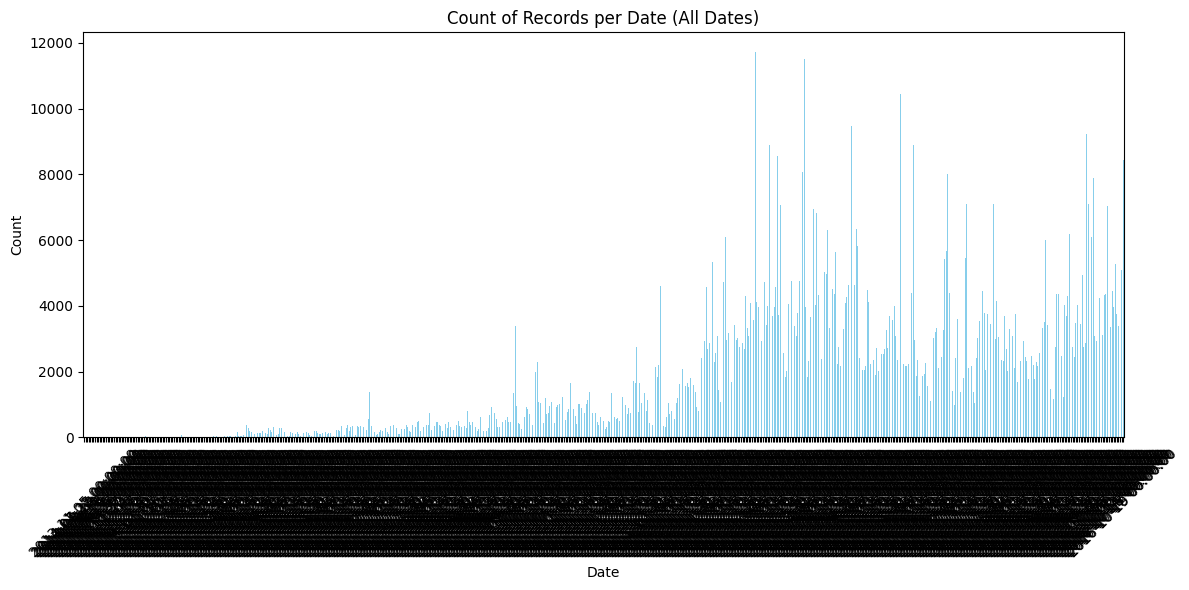

Minimum Date: 2013-11-05 00:00:00
Maximum Date: 2016-10-19 00:00:00
Yes. there are dates outside of the range, from 2013-11-05 to 2016-10-19
(1125659, 18)


In [165]:
# 1k YOUR CODE HERE
import matplotlib.pyplot as plt

contrib['contb_receipt_dt'] = pd.to_datetime(contrib['contb_receipt_dt'], errors='coerce')
date_counts = contrib.groupby('contb_receipt_dt').size()
plt.figure(figsize=(12, 6))
date_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Records per Date (All Dates)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

min_date = contrib['contb_receipt_dt'].min()
max_date = contrib['contb_receipt_dt'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

# primary period (defined as 1 Jan 2014 to 7 June 2016

print("Yes. there are dates outside of the range, from 2013-11-05 to 2016-10-19")
print(contrib.shape)

- **1k answer here:**

# Minimum Date: 2013-11-05 00:00:00
# Maximum Date: 2016-10-19 00:00:00
# Yes. there are dates outside of the range, from 2013-11-05 to 2016-10-19.

**1l.** Finally, answer the initial questions in the cells below (5 points)

**1l.1** Do we have the correct # of columns and rows.

- **1l.1 answer here:**

# Yes. We have 21432 rows x 20 columns.

**1l.2** Do the records contain data for the questions we want to answer?

- **1l.2 answer here:**

# Yes. The records contain data for questions we want to answer, because it contains data to associate contributor, their zipcode, with candidate.

**1l.3** What columns are important?

- **1l.3 answer here:** 

# Referencing questions:
# - Which zipcode (5-digit zipcode) had the highest count of contributions and the most dollar amount?
# - What day(s) of the month do most people donate?

# CAND_NM, # CONTBR_NM, # CONTBR_ZIP, CONTB_RECEIPT_DT are important to answer the questions.

**1l.4** What columns can be dropped?

- **1l.4 answer here:** 

# The other columns can be droped after filtering.

**1l.5** What are the data problems?

- **1l.5 answer here:**

# Problems include:
# There are duplicate entries that we need to filter out.
# There is no full clarify on the negative contribution amount.

**1l.6** List anys so far:

- **1l.6 answer here:**

# Assumptions include:
# Duplicate entries can be resolved with above initial analysis.
# Negative contribution amount can be resolved with above initial analysis.

***
## 2. Data filtering and data quality fixes (30 points)

Now that we have a basic understanding of the data, let's filter out the records we don't need and fix the data.

**2a.** From the dataset filter out (remove) any election_tp not in the primary election. Print/show the shape of the dataframe after the filtering is complete. (5 points)

In [166]:
# 2a YOUR CODE HERE
contrib = contrib[contrib['election_tp'] == 'P2016']

# Print/show the shape of the filtered DataFrame
print("Shape of DataFrame after filtering for primary election:")
print(contrib.shape)

Shape of DataFrame after filtering for primary election:
(810481, 18)


**2b.** From the dataset filter out (remove) any candidate that is not Bernie Sanders. Print/show the shape of the dataframe after the filtering is complete. (5 points)

In [167]:
# 2b YOUR CODE HERE
contrib = contrib[contrib['cand_nm'] == 'Sanders, Bernard']

# Print/show the shape of the filtered DataFrame
print("Shape of DataFrame after filtering for Bernie Sanders:")
print(contrib.shape)

Shape of DataFrame after filtering for Bernie Sanders:
(407171, 18)


**2c.** The `contbr_zip` column is not formatted well for our analysis. Make a new zipcode column that is the five-digit zipcodes. Filter out any records outside of California based on the zipcode. Print/show the shape of the dataframe after the filtering is complete. (10 points).

- You will have to research what the valid 5-digit zipcodes for California are!

In [168]:
# 2c YOUR CODE HERE
contrib['zipcode'] = contrib['contbr_zip'].str[:5]

ca_zipcodes = pd.read_csv('California_Zip_Codes.csv', dtype={'ZIP_CODE': str})['ZIP_CODE']
print(ca_zipcodes.head())

contrib = contrib[contrib['zipcode'].isin(ca_zipcodes)]
contrib2 = contrib[contrib['contbr_st']=='CA']

print("Shape of DataFrame after filtering for california zip codes:")
print(contrib.shape)

print("Shape of DataFrame after filtering for california zip codes:")
print(contrib2.shape)

# Source: https://gis.data.ca.gov/datasets/CDEGIS::california-zip-codes/explore

0    00012
1    00016
2    00017
3    00018
4    00019
Name: ZIP_CODE, dtype: object
Shape of DataFrame after filtering for california zip codes:
(21450, 19)
Shape of DataFrame after filtering for california zip codes:
(21450, 19)


**2d.** The receipt amount column has negative donations. After talking with your team, a decision was made that the best course of action is to remove these negative values so that the donation count and amount is more accurate. Print/show the shape of the dataframe after the filtering is complete. (5 points)

In [169]:
# 2d YOUR CODE HERE
contrib = contrib[contrib['contb_receipt_amt'] > 0]

print("Shape of DataFrame after filtering out the negative values:")
print(contrib.shape)

Shape of DataFrame after filtering out the negative values:
(21432, 19)


**2e.** From the dataset drop any columns that won't be used in the analysis. Print/show the shape of the dataframe after the dropping is complete. What columns did you drop and why? (5 points)

In [170]:
# 2e YOUR CODE HERE

contrib = contrib.drop_duplicates(subset='tran_id', keep='first')
print("Shape of DataFrame after filtering out the duplicate transaction ids:")
print(contrib.shape)

print(contrib.head)

# cand_nm, zipcode, contb_receipt_amt, contb_receipt_dt are needed. The other columns are dropped because they do not directly help answer the question.

Shape of DataFrame after filtering out the duplicate transaction ids:
(21432, 19)
<bound method NDFrame.head of           cmte_id    cand_id           cand_nm          contbr_nm  \
240572  C00577130  P60007168  Sanders, Bernard       YOUNG, JASON   
240575  C00577130  P60007168  Sanders, Bernard        ROMO, SUSAN   
240578  C00577130  P60007168  Sanders, Bernard     ROSENBERG, LOU   
240579  C00577130  P60007168  Sanders, Bernard  CHITTENDEN, DAVID   
240582  C00577130  P60007168  Sanders, Bernard       THOMAS, NEAL   
...           ...        ...               ...                ...   
819180  C00577130  P60007168  Sanders, Bernard    PHILLIPS, VICKI   
819181  C00577130  P60007168  Sanders, Bernard  SCHAFFER, MICHAEL   
819182  C00577130  P60007168  Sanders, Bernard   SCIARONI, DANIEL   
819187  C00577130  P60007168  Sanders, Bernard  MATTHEWS, ADRIANA   
819195  C00577130  P60007168  Sanders, Bernard     DUFFY, CRELLAN   

          contbr_city contbr_st contbr_zip          contbr_

- **2e answer here:**

# cand_nm, zipcode, contb_receipt_amt, contb_receipt_dt are needed because they directly answer the two questions.
# The other columns are dropped because they do not directly help answer the question.

**2f.** List any assumptions that you made up to this point:

- **2f answer here:**

# Assumptions:
# Data are formatted correctly and complete.
# 5 digit zip code list is complete and correct.
# Remove rows with negative contribution amounts is the correct process, and do not negatively impact the study.
# Duplicate entries can be resolved with above initial analysis.

***
## 3. Answering the questions (20 points)

Now that the data is cleaned and filterd - let's answer the two questions from your boss!

**3a.** Which zipcode had the highest count of contributions and the most dollar amount? (10 points)

In [171]:
# 3a YOUR CODE HERE
zipcode_aggregates = contrib.groupby('zipcode').agg(
    count_of_contributions=pd.NamedAgg(column='contb_receipt_amt', aggfunc='count'),
    sum_of_contributions=pd.NamedAgg(column='contb_receipt_amt', aggfunc='sum')
)

# Sort by count of contributions and print the top 5
top_5_by_count = zipcode_aggregates.sort_values(by='count_of_contributions', ascending=False).head(5)

# Sort by sum of contributions and print the top 5
top_5_by_sum = zipcode_aggregates.sort_values(by='sum_of_contributions', ascending=False).head(5)

# Print the results
print("Top 5 zipcodes by count of contributions:\n", top_5_by_count)
print("\nTop 5 zipcodes by sum of contributions:\n", top_5_by_sum)

Top 5 zipcodes by count of contributions:
          count_of_contributions  sum_of_contributions
zipcode                                              
94110                       258             21,953.46
94114                       199             15,879.72
94117                       173             16,597.44
95060                       145              6,581.26
95062                       135              5,929.30

Top 5 zipcodes by sum of contributions:
          count_of_contributions  sum_of_contributions
zipcode                                              
94110                       258             21,953.46
94117                       173             16,597.44
94114                       199             15,879.72
94115                        59             13,180.67
94122                       111             11,306.04


- **3a answer here:** 
# 94110, 94114, 94117, 95060, 95062 have the highest count of contributions.
# 94110, 94117, 94114, 94115, 94122 have the highest sum of contributions.

**3b.** What day(s) of the month do most people donate? (10 points)

In [172]:
# 3b YOUR CODE HERE

contrib['day_of_month'] = contrib['contb_receipt_dt'].dt.day

day_of_month_stats = contrib.groupby('day_of_month').agg(
    count_of_contributions=pd.NamedAgg(column='contb_receipt_amt', aggfunc='count')
)

sorted_day_of_month_stats = day_of_month_stats.sort_values(by='count_of_contributions', ascending=False)
print("Most popular donation days of the month:\n")
print(sorted_day_of_month_stats)

Most popular donation days of the month:

              count_of_contributions
day_of_month                        
9                               2832
31                              2762
14                              1823
27                              1309
29                              1044
8                                988
26                               951
25                               891
28                               859
7                                791
1                                784
6                                650
30                               526
13                               518
5                                507
4                                424
23                               410
12                               390
15                               372
11                               341
3                                337
2                                291
18                               250
17                               

- **3b answer here:** 
# The 9th, 31, and 14 are the days of month with the most count of donations.

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k